In [1]:
import matplotlib.pyplot as plt
import numpy as np

from skimage.io import imread             # 이미지를 읽어 들인다
from skimage.transform import resize      # 이미지의 크기를 변경할 수 있다

In [2]:
url = 'https://github.com/dknife/ML/raw/main/data/Proj1/40/'

imgR, imgC, channel = 24, 24, 3
images = []

for i in range(40):
    file = url + 'img{0:02d}.jpg'.format(i+1)    # 이미지 파일 이름을 만든다
    img = imread(file)                           # 이미지를 읽는다
    img = resize(img, (imgR,imgC, channel))      # 이미지의 크기를 변경한다
    images.append(img)                           # img에 담는다

<Figure size 432x288 with 0 Axes>

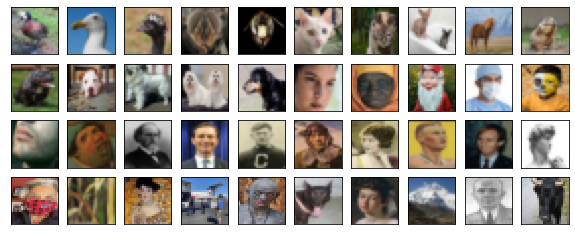

In [3]:
def plot_images(nRow, nCol, img):
    fig = plt.figure()
    fig, ax = plt.subplots(nRow, nCol, figsize = (nCol,nRow))
    for i in range(nRow):
        for j in range(nCol):
            if nRow <= 1: axis = ax[j]
            else:         axis = ax[i, j]
            axis.get_xaxis().set_visible(False)
            axis.get_yaxis().set_visible(False)
            axis.imshow(img[i*nCol+j])

plot_images(4, 10, images)

In [4]:
X = np.array(images[:30])
X_test =np.array(images[30:])

<Figure size 432x288 with 0 Axes>

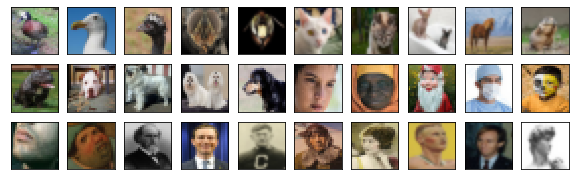

<Figure size 432x288 with 0 Axes>

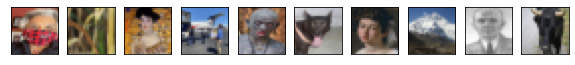

In [5]:
plot_images(3, 10, X)
plot_images(1, 10, X_test)

In [6]:
X_noisy = X + np.random.randn(len(X), imgR, imgC, channel)*0.1
X_noisy = np.clip(X_noisy, 0, 1)
X_test_noisy =  X_test + np.random.randn(len(X_test), imgR, imgC, channel)*0.1
X_test_noisy = np.clip(X_test_noisy, 0, 1)

<Figure size 432x288 with 0 Axes>

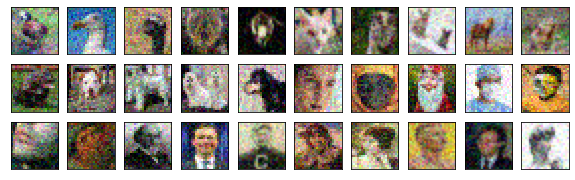

<Figure size 432x288 with 0 Axes>

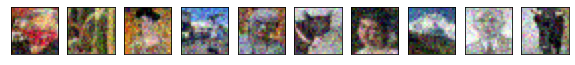

In [7]:
plot_images(3, 10, X_noisy)
plot_images(1, 10, X_test_noisy)

<Figure size 432x288 with 0 Axes>

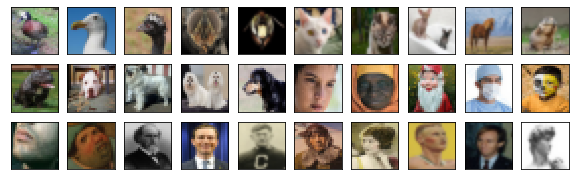

<Figure size 432x288 with 0 Axes>

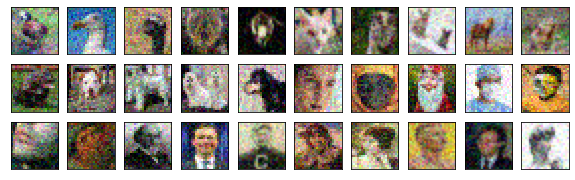

In [8]:
X_noisy_flat =X_noisy.reshape(-1, imgR*imgC*channel)
X_flat = np.array(X.reshape(-1, imgR*imgC*channel) * 255, dtype=np.uint)

plot_images(3, 10, X_flat.reshape(-1, imgR, imgC, channel))
plot_images(3, 10, X_noisy_flat.reshape(-1, imgR, imgC, channel))

In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_noisy_flat, X_flat)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

<Figure size 432x288 with 0 Axes>

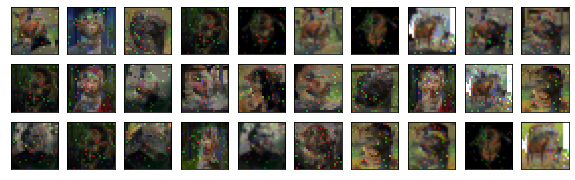

In [10]:
denoised_result = knn.predict(X_noisy_flat)
denoised_result = denoised_result.reshape(-1, imgR, imgC, channel)
plot_images(3, 10, denoised_result)

In [11]:
n_augmentation = 100
X_noisy_aug = X + np.random.rand(len(X), imgR, imgC, channel) * 0.2
y_label = np.array(X * 255, dtype = np.uint)
y = y_label

print(X_noisy.shape)
for i in range(n_augmentation):
    noisy_data = X + np.random.randn(len(X), imgR, imgC, channel) * 0.2
    X_noisy_aug = np.append(X_noisy_aug, noisy_data, axis=0)
    y = np.append(y, y_label, axis = 0)

X_noisy_aug = np.clip(X_noisy_aug, 0, 1)
X_noisy_aug.shape, y.shape

(30, 24, 24, 3)


((3030, 24, 24, 3), (3030, 24, 24, 3))

<Figure size 432x288 with 0 Axes>

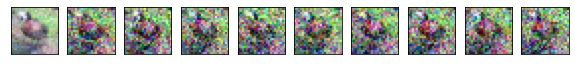

In [12]:
plot_images(1, 10, X_noisy_aug[0:300:30])

In [13]:
X_noisy_aug_flat = X_noisy_aug.reshape(-1, imgR*imgC*channel)
y_flat = y.reshape(-1, imgR*imgC*channel)

knn.fit(X_noisy_aug_flat, y_flat)
#knn.fit(X_train_noisy_flat, X_train_flat)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

<Figure size 432x288 with 0 Axes>

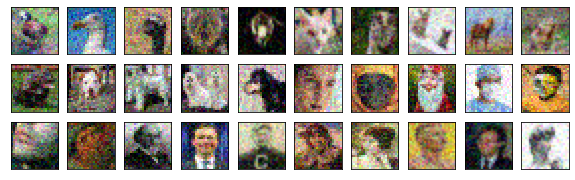

<Figure size 432x288 with 0 Axes>

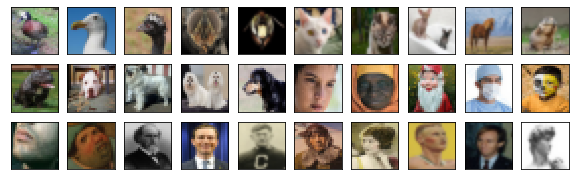

In [14]:
denoised_result = knn.predict(X_noisy_flat)
denoised_result = denoised_result.reshape(-1, imgR, imgC, channel)


plot_images(3, 10, X_noisy)
plot_images(3, 10, denoised_result)


<Figure size 432x288 with 0 Axes>

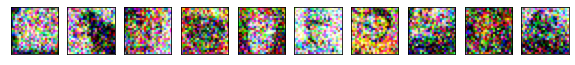

<Figure size 432x288 with 0 Axes>

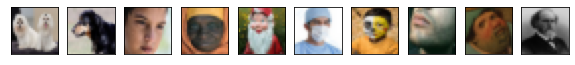

In [15]:
rndidx = np.random.randint(0, 20)
data = X[rndidx:rndidx+10] + np.random.randn(10, imgR, imgC, channel)*0.4
data = np.clip(data, 0, 1)
data_flat = data.reshape(-1, imgR*imgC*channel)

denoised = knn.predict(data_flat)
denoised = denoised.reshape(-1, imgR, imgC, channel)
denoised = np.clip(denoised, 0, 255)

plot_images(1, 10, data)
plot_images(1, 10, denoised)

<Figure size 432x288 with 0 Axes>

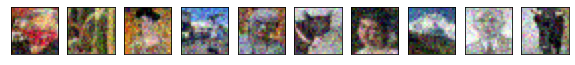

<Figure size 432x288 with 0 Axes>

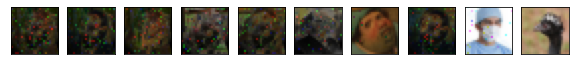

In [16]:
denoised = knn.predict(X_test_noisy.reshape(-1, imgR*imgC*channel))
denoised = denoised.reshape(-1, imgR, imgC, channel)

plot_images(1, 10, X_test_noisy)
plot_images(1, 10, denoised)

In [17]:
### Label Augmentation ####
from keras.preprocessing.image import ImageDataGenerator
image_generator = ImageDataGenerator(
    rotation_range=360,
    zoom_range=0.1,
    shear_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True)


In [18]:
y_aug = X.reshape(-1, imgR, imgC, channel)
it = image_generator.flow(y_aug)
nData = y_aug.shape[0]

In [19]:

X_aug = y_aug + np.random.randn(nData, imgR, imgC, channel)*0.1

n_augmentation = 500
for _ in range(n_augmentation):
    new_y = it.next()
    new_X = new_y + np.random.randn(nData, imgR, imgC, channel)*0.1
    y_aug = np.append(y_aug, new_y, axis=0)    
    X_aug = np.append(X_aug, new_X, axis=0)


y_aug = np.array(y_aug * 255, dtype = np.uint)
y_aug = y_aug.reshape(-1, imgR, imgC, channel)
X_aug = X_aug.reshape(-1, imgR, imgC, channel)

In [20]:
y_aug = np.clip(y_aug, 0,255)
X_aug = np.clip(X_aug, 0, 1)

<Figure size 432x288 with 0 Axes>

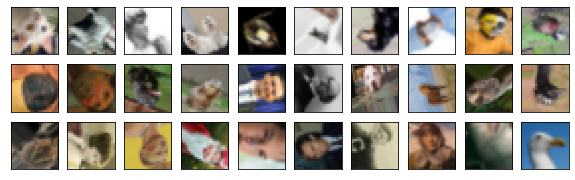

<Figure size 432x288 with 0 Axes>

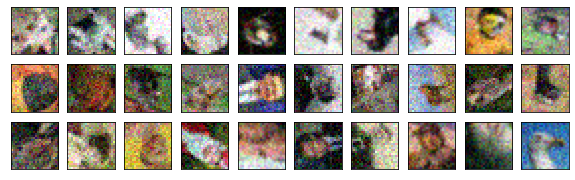

In [21]:
plot_images(3, 10, y_aug[30:])
plot_images(3, 10, X_aug[30:])

In [22]:
X_aug_flat = X_aug.reshape(-1, imgR*imgC*channel)
y_aug_flat = y_aug.reshape(-1, imgR*imgC*channel)
knn.fit(X_aug_flat, y_aug_flat)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

<Figure size 432x288 with 0 Axes>

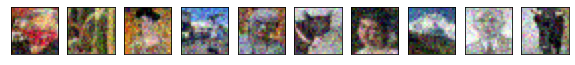

<Figure size 432x288 with 0 Axes>

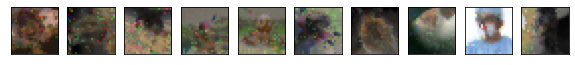

In [23]:
denoised = knn.predict(X_test_noisy.reshape(-1, imgR*imgC*channel))
denoised = denoised.reshape(-1, imgR, imgC, channel)

plot_images(1, 10, X_test_noisy)
plot_images(1, 10, denoised)

<Figure size 432x288 with 0 Axes>

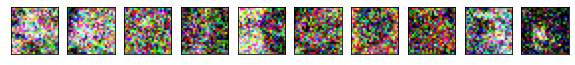

<Figure size 432x288 with 0 Axes>

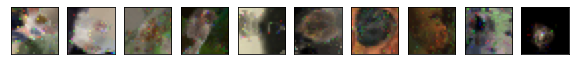

In [24]:
images = it.next()
testX = images + np.random.randn(nData, imgR, imgC, channel)*0.4
testX = np.clip(testX, 0, 1)
denoised = knn.predict(testX.reshape(-1, imgR*imgC*channel))
denoised = denoised.reshape(-1, imgR, imgC, channel)

plot_images(1, 10, testX)
plot_images(1, 10, denoised)